# IV CURVE OF A CELL

In [13]:
from pvlib import pvsystem
import pandas as pd
import matplotlib.pyplot as plt

# Example module parameters for the Canadian Solar CS5P-220M:
parameters = {
 'Name': 'Canadian Solar CS5P-220M',
 'BIPV': 'N',
 'Date': '10/5/2009',
 'T_NOCT': 42.4,
 'A_c': 1.7,
 'N_s': 96,
 'I_sc_ref': 5.1,
 'V_oc_ref': 59.4,
 'I_mp_ref': 4.69,
 'V_mp_ref': 46.9,
 'alpha_sc': 0.004539,
 'beta_oc': -0.22216,
 'a_ref': 2.6373,
 'I_L_ref': 5.114,
 'I_o_ref': 8.196e-10,
 'R_s': 1.065,
 'R_sh_ref': 381.68,
 'Adjust': 8.7,
 'gamma_r': -0.476,
 'Version': 'MM106',
 'PTC': 200.1,
 'Technology': 'Mono-c-Si',
}

cases = [
(1000, 55),
(800, 55),
(600, 55),
(400, 25),
(400, 40),
(400, 55)
]



In [10]:
conditions = pd.DataFrame(cases, columns=['Geff', 'Tcell'])

# adjust the reference parameters according to the operating conditions using the De Soto model:

IL, I0, Rs, Rsh, nNsVth = pvsystem.calcparams_desoto(

  conditions['Geff'],

  conditions['Tcell'],

  alpha_sc=parameters['alpha_sc'],

  a_ref=parameters['a_ref'],

  I_L_ref=parameters['I_L_ref'],

  I_o_ref=parameters['I_o_ref'],

  R_sh_ref=parameters['R_sh_ref'],

  R_s=parameters['R_s'],

  EgRef=1.121,

  dEgdT=-0.0002677

)

# plug the parameters into the SDE and solve for IV curves:

curve_info = pvsystem.singlediode(

  photocurrent=IL,

  saturation_current=I0,

  resistance_series=Rs,

  resistance_shunt=Rsh,

  nNsVth=nNsVth,

  ivcurve_pnts=100,

  method='lambertw'

)




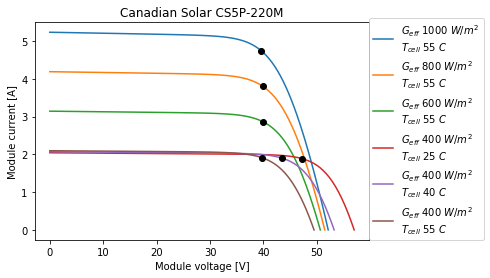

       i_sc       v_oc      i_mp       v_mp        p_mp
0  5.235561  52.129782  4.742078  39.617325  187.868460
1  4.190781  51.483032  3.805385  39.871330  151.725745
2  3.144837  50.649227  2.862258  39.952853  114.355370
3  2.043319  56.987478  1.886511  47.285357   89.204359
4  2.070523  53.238566  1.900933  43.492748   82.676788
5  2.097727  49.474043  1.911758  39.742278   75.977636


C:\Users\deepa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


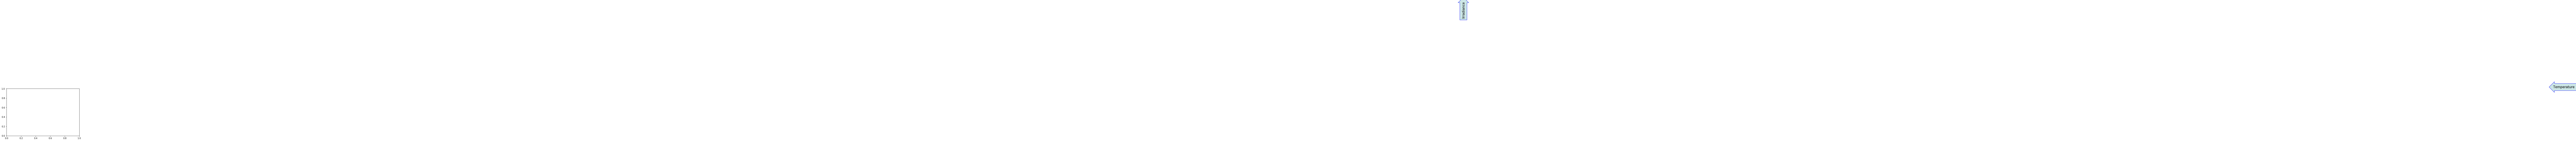

In [11]:
# plot the calculated curves:

plt.figure()
for i, case in conditions.iterrows():
    label = (
        "$G_{eff}$ " + f"{case['Geff']} $W/m^2$\n"
        "$T_{cell}$ " + f"{case['Tcell']} $C$"
        )

    plt.plot(curve_info['v'][i], curve_info['i'][i], label=label)
    v_mp = curve_info['v_mp'][i]
    i_mp = curve_info['i_mp'][i]
    # mark the MPP
    plt.plot([v_mp], [i_mp], ls='', marker='o', c='k')

plt.legend(loc=(1.0, 0))
plt.xlabel('Module voltage [V]')
plt.ylabel('Module current [A]')
plt.title(parameters['Name'])
plt.show()
plt.gcf().set_tight_layout(True)

# draw trend arrows

def draw_arrow(ax, label, x0, y0, rotation, size, direction):
    style = direction + 'arrow'
    bbox_props = dict(boxstyle=style, fc=(0.8, 0.9, 0.9), ec="b", lw=1)
    t = ax.text(x0, y0, label, ha="left", va="bottom", rotation=rotation,
                size=size, bbox=bbox_props, zorder=-1)

    bb = t.get_bbox_patch()
    bb.set_boxstyle(style, pad=0.6)

ax = plt.gca()
draw_arrow(ax, 'Irradiance', 20, 2.5, 90, 15, 'r')
draw_arrow(ax, 'Temperature', 35, 1, 0, 15, 'l')

print(pd.DataFrame({
    'i_sc': curve_info['i_sc'],
    'v_oc': curve_info['v_oc'],
    'i_mp': curve_info['i_mp'],
    'v_mp': curve_info['v_mp'],
    'p_mp': curve_info['p_mp'],

}))
